# Problem Set 1

## Problem 1

- Use the dataset `cig85_95`

The data was used in the top economics journal American Economic Review (AER) to analyze if the package prices of cigarettes influence how much people smoke

The data set consists of annual data for the 48 continental U.S. states from 1985 - 1995,  derived from state tax collection data

- Quantity consumed is measured by annual per capita cigarette sales in packs per fiscal year.  
- The price is the average retail cigarette price per pack during the fiscal year, including taxes.
- Income is per capita income.  
- The general sales tax is the average tax, in cents per pack, due to the broad-based state sales  tax applied to all consumption goods. 
- The cigarette-specific tax is the tax applied to cigarettes only.  
- All prices, income, and taxes used in the regressions in this chapter are deflated by the Consumer Price Index and thus are in real dollars.  

We are grateful to Professor Jonathan Gruber of MIT for providing us with these data.

The dataset is in the `.dta` format and also contains additional information per column which you can extract using
```python
df.variable_labels()
```
where `df` is the name of the dataframe.

To make this work, you have to add `,iterator=True` before the closing parenthesis when you load the dataframe. 
This will give you a better understanding on the meaning of the variables.

However, some commands don't work after that, so you need to load the dataframe again in a new cell to execute further analysis and data manipulation.



1. What type of dataset do we have and how do you see this?
1. How many observations (rows) does the dataset contain?
1. How many years are covered?
1. How many states?
1. What is the mean, minimum and maximum of the column pop?
1. What is the mean, minimum and maximum of column packpc in AL (Alabama)?
1. What is the mean of the column income in Texas in 1995?
1. How many distinct values does cpi have?
1. Generate a new column which is the logarithm of taxs and call it log_taxs
1. Plot the square of avgprs against packpc and make the plot look nice
1. Plot a histogram of the logarithm of taxes
1. Add a column to the dataset that consists only of 4s and call it fours
1. Replace rows 3 to 5 of column named four (the one you just made) by 0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
df0 = pd.read_stata('data/cig85_95.dta', iterator=True)
df0.variable_labels()

{'state': '',
 'year': '',
 'cpi': '',
 'pop': 'population from RAs before 1990; from web for 1990-2000',
 'packpc': 'packs per capita = packs/pop',
 'income': 'state personal income (total, nominal)',
 'tax': 'average state, federal, and average local excise taxes for   fiscal year',
 'avgprs': 'average price during fiscal year, including sales taxes',
 'taxs': 'average excise taxes for fiscal year, including sales taxes'}

**1.** What type of data set do we have and how do you see this?

In [3]:
df = pd.read_stata('data/cig85_95.dta')
df.head()

,state,year,cpi,pop,packpc,income,tax,avgprs,taxs
0,AL,1985.0,1.076,3973000.0,116.486282,46014968.0,32.500004,102.181671,33.348335
1,AR,1985.0,1.076,2327000.0,128.534592,26210736.0,37.000000,101.474998,37.000000
2,AZ,1985.0,1.076,3184000.0,104.522614,43956936.0,31.000000,108.578751,36.170418
3,CA,1985.0,1.076,26444000.0,100.363037,447102816.0,26.000000,107.837341,32.104000
4,CO,1985.0,1.076,3209000.0,112.963539,49466672.0,31.000000,94.266663,31.000000


It's a pooled cross section.

**2.**

In [4]:
print(df.shape)

(528, 9)


The data set contains 528 observations.

**3.** How many years are covered?

In [5]:
len(df['year'].unique())

11

11 years are covered by the dataframe.

**4.** How many states?

In [6]:
len(df['state'].unique())

48

The dataframe covers 48 states.

**5.** Whats is the mean, minimum and maximum of the column pop?

In [7]:
print(f"Mean of pop: {df['pop'].mean()}")
print(f"Min of pop: {df['pop'].min()}")
print(f"Max of pop: {df['pop'].max()}")

Mean of pop: 5159738.5
Min of pop: 453401.0
Max of pop: 31493524.0


**6.** Whats is the mean, minimum and maximum of column packpc in AL ?

In [8]:
print(f"Mean of packpc: {df['packpc'][df.state == 'AL'].mean()}")
print(f"Min of packpc: {df['packpc'][df.state == 'AL'].min()}")
print(f"Max of packpc: {df['packpc'][df.state == 'AL'].max()}")

Mean of packpc: 109.91625213623047
Min of packpc: 101.08543395996094
Max of packpc: 117.15931701660156


**7.** What is the mean of the column income in Texas in 1995?

In [9]:
print(f"Mean of income in Texas in 1995: {float(df['income'][df.year == 1995][df.state == 'TX'])}")

Mean of income in Texas in 1995: 402096768.0


**8.** How many distinct values does cpi have?

In [10]:
print(f"Distinct values of cpi: {len(df.cpi.unique())}")

Distinct values of cpi: 11


**9.** Generate a new column which is the logarithm af taxs and call it log_taxs.

In [11]:
df['log_taxs'] = np.log(df['taxs'])

**10.** Plot the square of avgprs against packpc and make the plot look nice.

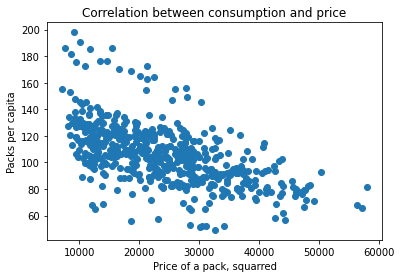

In [12]:
avgprs_square = df['avgprs']**2
plt.scatter(avgprs_square, df['packpc'])
plt.title('Correlation between consumption and price')
plt.xlabel('Price of a pack, squarred')
plt.ylabel('Packs per capita')
plt.show()

**11.** Plot a histogram of the logarithm of taxes.

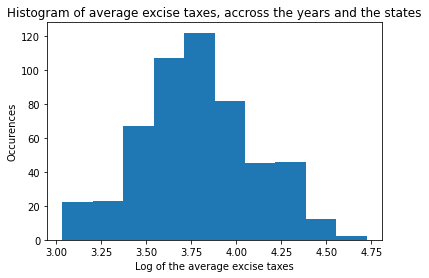

In [13]:
plt.hist(df['log_taxs'])
plt.title('Histogram of average excise taxes, accross the years and the states')
plt.xlabel('Log of the average excise taxes')
plt.ylabel('Occurences')
plt.show()

**12.** Add a column to the dataset that consists only of 4s and call it fours.

In [14]:
df['fours'] = 4.

**13.** Replace rows 3 to 5 of column named four

In [15]:
df.iloc[3:5]['fours']

3    4.0
4    4.0
Name: fours, dtype: float64

In [16]:
df.loc[2:5,'fours'] = 0.
df.head(7)

,state,year,cpi,pop,packpc,income,tax,avgprs,taxs,log_taxs,fours
0,AL,1985.0,1.076,3973000.0,116.486282,46014968.0,32.500004,102.181671,33.348335,3.507008,4.0
1,AR,1985.0,1.076,2327000.0,128.534592,26210736.0,37.000000,101.474998,37.000000,3.610918,4.0
2,AZ,1985.0,1.076,3184000.0,104.522614,43956936.0,31.000000,108.578751,36.170418,3.588242,0.0
3,CA,1985.0,1.076,26444000.0,100.363037,447102816.0,26.000000,107.837341,32.104000,3.468981,0.0
4,CO,1985.0,1.076,3209000.0,112.963539,49466672.0,31.000000,94.266663,31.000000,3.433987,0.0
5,CT,1985.0,1.076,3201000.0,109.278351,60063368.0,42.000000,128.024994,51.483334,3.941258,0.0
6,DE,1985.0,1.076,618000.0,143.851135,9927301.0,30.000000,102.491661,30.000000,3.401197,4.0


# Problem 2

**Experiment on the Effect of Class Size Reductions**

In experiment it was attempted to asses the effect of reducing class size  on test scores in the early grades. In the late 1980s, Tennessee conducted a large, multimillion-dollar randomized controlled experiment to ascertain
whether class size reduction was an effective way to improve elementary education.
The results of this experiment have strongly influenced our understanding of the effect of class size reductions.

**Experimental Design**

<blockquote> The Tennessee class size reduction experiment, known as Project STAR (Student–
Teacher Achievement Ratio), was a 4-year experiment designed to evaluate the effect
on learning of small class sizes. Funded by the Tennessee state legislature, the experiment
cost approximately $12 million. The study compared three different class arrangements
for kindergarten through third grade: a regular-sized class, with 22 to 25 students
per class, a single teacher, and no teacher’s aide; a small class, with 13 to 17 students per
class and no teacher’s aide; and a regular-sized class with a teacher’s aide.
Each school participating in the experiment had at least one class of each type,
and students entering kindergarten in a participating school were randomly assigned
to one of these three groups at the beginning of the 1985–1986 academic year. Teachers
were also assigned randomly to one of the three types of classes.
According to the original experimental protocol, students would stay in their initially
assigned class type for the 4 years of the experiment (kindergarten through third
grade). However, because of parent complaints, students initially assigned to a regular
class (with or without an aide) were randomly reassigned at the beginning of first grade
to a regular class with an aide or to a regular class without an aide; students initially
assigned to a small class remained in a small class. Students entering school in first
grade (kindergarten was optional), in the second year of the experiment, were randomly
assigned to one of the three groups. Each year students in the experiment were
given standardized tests (the Stanford Achievement Test) in reading and math.
The project paid for the additional teachers and aides necessary to achieve the
target class sizes. During the first year of the study, approximately 6400 students
participated in 108 small classes, 101 regular-sized classes, and 99 regular-sized classes
with an aide. Over all 4 years of the study, a total of approximately 11,600 students
at 80 schools participated in the study.

Please use the `webstar.dta` data.
    


In [17]:
df0 = pd.read_stata('data/webstar.dta', iterator='True')
df0.variable_labels()

{'newid': 'new student id for public star datasets',
 'ssex': 'student sex   (1m2f)',
 'srace': 'student race  (1w2b3a4h5i6o)',
 'sbirthq': 'quater of students birth',
 'sbirthy': 'year of students birth',
 'stark': 'attend project star class in kindergarten',
 'star1': 'attend project star class in 1st grade',
 'star2': 'attend project star class in 2nd grade',
 'star3': 'attend project star class in 3rd grade',
 'cltypek': 'classroom type  (1s2r3ra) in kindergarten',
 'cltype1': 'classroom type  (1s2r3ra) in first grade',
 'cltype2': 'classroom type  (1s2r3ra) in second grade',
 'cltype3': 'classroom type  (1s2r3ra) in third grade',
 'schtypek': 'school type - (1i2s3r4u) in kindergarten',
 'hdegk': 'highest degree (tch) of kindergarten teacher',
 'cladk': 'teacher career ladder level in kindergarten',
 'totexpk': 'years of total teaching experience - kindergarten',
 'tracek': 'teacher race  (1w2b3a4h5i6o) in kindergarten',
 'treadssk': 'total reading scaled score - sesat ii stanford'

In [18]:
df = pd.read_stata('data/webstar.dta')
df.head()

,newid,ssex,srace,sbirthq,sbirthy,stark,star1,star2,star3,cltypek,...,clad3,totexp3,sysidkn,sysid1n,sysid2n,sysid3n,schidkn,schid1n,schid2n,schid3n
0,1122,female,black,"3rd qtr - july,aug,sept",1979.0,no,no,no,yes,NaN,...,ladder level 1,30.0,NaN,NaN,NaN,22.0,NaN,NaN,NaN,54.0
1,1137,female,white,"1st qtr - jan,feb,march",1980.0,yes,yes,yes,yes,small class,...,apprentice,1.0,30.0,30.0,30.0,30.0,63.0,63.0,63.0,63.0
2,1143,female,black,"4th qtr - oct,nov,dec",1979.0,yes,yes,yes,yes,small class,...,ladder level 1,4.0,11.0,11.0,11.0,11.0,20.0,20.0,20.0,20.0
3,1160,male,white,"4th qtr - oct,nov,dec",1979.0,no,no,no,yes,NaN,...,ladder level 1,10.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,8.0
4,1183,male,black,"1st qtr - jan,feb,march",1980.0,yes,no,no,no,regular + aide class,...,NaN,NaN,11.0,NaN,NaN,NaN,19.0,NaN,NaN,NaN


**1.** How many male and how many female students are in the data?

In [19]:
print(f"The data contains {len(df[df.ssex == 'male'])} male students and {len(df[df.ssex == 'female'])} female student")

The data contains 6122 male students and 5456 female student


In [20]:
df.ssex.unique()

['female', 'male', NaN]
Categories (2, object): ['male' < 'female']

**2.** Make a bar chart.

Text(0, 0.5, 'Number of attendants')

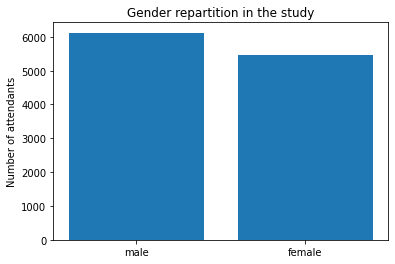

In [21]:
plt.bar(['male', 'female'], df.ssex.value_counts())
plt.title("Gender repartition in the study")
plt.ylabel("Number of attendants")

**3.** What is the share of male-black, male-white, female-black, female-white, male-non-black-or-white (all other races combinated) and female non-black-or-white students?

In [22]:
df['my_race'][df.srace != 'black'][df.srace != 'white']

KeyError: 'my_race'

In [ ]:
df['my_race'] = None
df['my_race'][df.srace == 'white'] = 'white'
df['my_race'][df.srace == 'black'] = 'black'
df['my_race'][df.my_race == None] = 'other'

/var/folders/2x/jyk25dss11q4zcwpyjj6vtx40000gn/T/ipykernel_1083/4233494741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['my_race'][df.srace == 'white'] = 'white'
/var/folders/2x/jyk25dss11q4zcwpyjj6vtx40000gn/T/ipykernel_1083/4233494741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['my_race'][df.srace == 'black'] = 'black'
/var/folders/2x/jyk25dss11q4zcwpyjj6vtx40000gn/T/ipykernel_1083/4233494741.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

I know this method is not perfect considering copy issues in pandas. However, I can't help myself finding another way...

In [ ]:
df.value_counts(['ssex', 'my_race'], normalize=True, sort=True)*100

ssex    my_race
male    white      33.512229
female  white      29.773007
male    black      19.329579
female  black      17.385184
dtype: float64

1. How many male and how many female students are in the data?
1. make a bar chart.
1. What is the share of male-black, male-white, female-black, female-white, male-non-black-or-white (all other races combined) and female non-black-or-whitestudents?
1. Make a pie chart.
1. What is the range of the total reading scaled score (_treadssk_)?
1. What is the mean of the math scaled score (_tmathssk_) for students that have attended the STAR project in the kindergarden and have been in a small class (_cltypek_) and what is for students that have attended the STAR project in the kindergarden and have been in a regular class (not including the 'regular+aid' category)? (Note that this is no very informative as those that have been in a small class in kindergarden may have been in a regular class in first and /or second grade while those that haven't been in a small class in kindergarden may have been in so in first or second grade) 
1. What is the combined math and resing scaled score (the sum of _tmathssk_ and _treadssk_) for students that have been in a small class in kindergarden, first grade and second grade (_cltypek_,_cltype1_ and _cltype2_) compared to students that have never been in a small class (_cltypek_, _cltype1_ and _cltype2_ are either 'regular' or missing). Exclude the regular+aide' category for this exercise.
1. Regarding the former task: is the difference larger or smaller for white than for non-white students?

# Exercise 3

**Wage and Education**

<blockquote> For the population of people in the workforce in 1976, let $y=wage$, where $wage$ is measured in dollars per hour. Thus, for a particular person, if $wage$=6.75, the hourly wage is \$6.75. Let $x=educ$ denote years of schooling; for example, $educ=12$ corresponds to a complete high school education.

We are interested in studying the relation between education and wage, and our regression model is  


\begin{equation*}
wage=\beta_0+\beta_1education+u
\end{equation*}

Because the average wage in the sample is \\$5.90, the Consumer Price Index indicates that this amount is equivalent to \\$24.90 in 2016 dollars.

1. Describe the dataset descriptively (mean, minimum, maximum,  number of observations).
1. Estimate the paramters by hand and using a built-in routine.
1. How do we interpret the parameter estimates?
1. Do you think the assumtpion $E(u|x)=0$ is met? If not - why not? And what does it mean?
1. Plot the fit.

**1.** Describe the dataset descriptively.

In [ ]:
df = pd.read_stata('data/wages.dta')
df.head()

,nr,year,black,exper,hisp,hours,married,occ1,occ2,occ3,...,union,lwage,d81,d82,d83,d84,d85,d86,d87,expersq
0,13.0,1980.0,0.0,1.0,0.0,2672.0,0.0,0.0,0.0,0.0,...,0.0,1.197540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,13.0,1981.0,0.0,2.0,0.0,2320.0,0.0,0.0,0.0,0.0,...,1.0,1.853060,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,13.0,1982.0,0.0,3.0,0.0,2940.0,0.0,0.0,0.0,0.0,...,0.0,1.344462,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0
3,13.0,1983.0,0.0,4.0,0.0,2960.0,0.0,0.0,0.0,0.0,...,0.0,1.433213,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.0
4,13.0,1984.0,0.0,5.0,0.0,3071.0,0.0,0.0,0.0,0.0,...,0.0,1.568125,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0


In [ ]:
df.describe()

,nr,year,black,exper,hisp,hours,married,occ1,occ2,occ3,...,union,lwage,d81,d82,d83,d84,d85,d86,d87,expersq
count,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,...,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.00000
mean,5262.058594,1983.500000,0.115596,6.514679,0.155963,2191.257324,0.438991,0.103899,0.091514,0.053440,...,0.244037,1.649147,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,50.42477
std,3496.149902,2.291551,0.319777,2.825873,0.362862,566.352295,0.496321,0.305165,0.288371,0.224936,...,0.429564,0.532609,0.330757,0.330757,0.330757,0.330757,0.330757,0.330757,0.330757,40.78199
min,13.000000,1980.000000,0.000000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-3.579079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2329.000000,1981.750000,0.000000,4.000000,0.000000,2040.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.350717,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.00000
50%,4569.000000,1983.500000,0.000000,6.000000,0.000000,2080.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.671143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.00000
75%,8406.000000,1985.250000,0.000000,9.000000,0.000000,2414.250000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.991086,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.00000
max,12548.000000,1987.000000,1.000000,18.000000,1.000000,4992.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,4.051860,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,324.00000


**3.**  Estimate the parameters by hand and using a built-in routine.

In [ ]:
df['wage'] = np.exp(df['lwage'])

In [ ]:
# By hand

beta1_hand = df['wage'].cov(df['educ']) / df['educ'].var()
beta0_hand = df['wage'].mean() - beta1_hand * df['educ'].mean()

print(f"The parameters (by hand) are :\n beta0 = {beta0_hand} \n beta1 = {beta1_hand}")

The parameters (by hand) are :
 beta0 = 0.2151629854239987 
 beta1 = 0.48474763940507226


In [ ]:
# Built-in routine

reg = smf.ols(formula='wage ~ educ', data=df)
results = reg.fit()
b = results.params

beta0_builtin = b[0]
beta1_builtin = b[1]

print(f"The parameters (built-in) are :\n beta0 = {beta0_builtin} \n beta1 = {beta1_builtin}")

The parameters (built-in) are :
 beta0 = 0.21516305582875672 
 beta1 = 0.4847476295871239


In [ ]:
print(f"The parameters differ by {abs(beta0_builtin - beta0_hand) / beta0_builtin * 100} % for beta0 \n and {abs(beta1_builtin - beta1_hand) / beta1_builtin * 100} % for beta1.") 

The parameters differ by 3.2721583058194825e-05 % for beta0 
 and 2.0253731517092925e-06 % for beta1.


**3.** How do we interpret the parameter estimates?

The wage earned by a person who hasn't recieved any education is \$0.22 (per hour) and an additional year of eduction allows a growth of \$0.48 (per hour).

**4.** Do you think the assumption $E(u|x) = 0$ is met? If not - why not? And what does it mean?

I don't think this assumption is correct because education is correlated with other paramaters that have been omitted here that influence the wage.

**5.** Plot the fit.

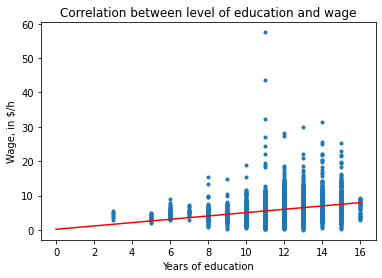

In [ ]:
plt.scatter(df.educ, df.wage, marker='.')
educ_axis = np.linspace(0, 16, 100)
plt.plot(educ_axis, beta0_hand + beta1_hand * educ_axis, color='red')
plt.title('Correlation between level of education and wage')
plt.xlabel('Years of education')
plt.ylabel('Wage, in $/h')
plt.show()

# Exercise 4

**Voting Outcomes and Campaign Expenditures**

<blockquote> The file VOTE1 contains data on election outcomes and campaign expenditures for 173 two-party races for the U.S. House of Representatives in 1988. There are two candidates in each race, A and B. Let $voteA$ be the percentage of the vote received by Candidate A and $shareA$ be the percentage of
total campaign expenditures accounted for by Candidate A. Many factors other than $shareA$ affect the election outcome (including the quality of the candidates and possibly the dollar amounts spent by A and B). Nevertheless, we can estimate a simple regression model to find out whether spending more relative to one’s challenger implies a higher percentage of the vote.
The regression model in this case is 

\begin{equation*}
voteA=\beta_0+\beta_1shareA+u
\end{equation*}

1. Describe the dataset descriptively (mean, minimum, maximum,  number of observations).
1. Estimate the paramters by hand and using a built-in routine.
1. How do we interpret the parameter estimates?
1. Do you think the assumtpion $E(u|x)=0$ is met? If not - why not? And what does it mean?
1. Plot the fit.


**1.** Describe the dataset descriptively (mean, minimum, maximum, number of observations).

In [ ]:
import wooldridge as woo

df = woo.dataWoo('vote1')
df.head()

,state,district,democA,voteA,expendA,expendB,prtystrA,lexpendA,lexpendB,shareA
0,AL,7,1,68,328.295990,8.737000,41,5.793916,2.167567,97.407669
1,AK,1,0,62,626.377014,402.476990,60,6.439952,5.997638,60.881039
2,AZ,2,1,73,99.607002,3.065000,55,4.601233,1.120048,97.014763
3,AZ,3,0,69,319.690002,26.281000,64,5.767352,3.268846,92.403702
4,AR,3,0,75,159.220993,60.054001,66,5.070293,4.095244,72.612473


In [ ]:
df.describe()

,district,democA,voteA,expendA,expendB,prtystrA,lexpendA,lexpendB,shareA
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,8.838150,0.554913,50.502890,310.611005,305.088537,49.757225,5.025556,4.944369,51.076545
std,8.768823,0.498418,16.784761,280.985381,306.278339,9.983650,1.601602,1.571143,33.483575
min,1.000000,0.000000,16.000000,0.302000,0.930000,22.000000,-1.197328,-0.072571,0.094635
25%,3.000000,0.000000,36.000000,81.634003,60.054001,44.000000,4.402246,4.095244,18.867996
50%,6.000000,1.000000,50.000000,242.781998,221.529999,50.000000,5.492164,5.400558,50.849903
75%,11.000000,1.000000,65.000000,457.410004,450.716003,56.000000,6.125580,6.110837,84.255096
max,42.000000,1.000000,84.000000,1470.673950,1548.192993,71.000000,7.293476,7.344844,99.495003


**2.** Estimate the paramters by hand and using a built-in routine.

In [ ]:
# By hand

beta1_h = df['voteA'].cov(df['shareA']) / df['shareA'].var()
beta0_h = df['voteA'].mean() - beta1_h * df['shareA'].mean()

print(f"The parameters (by hand) are :\n beta0 = {beta0_h} \n beta1 = {beta1_h}")

The parameters (by hand) are :
 beta0 = 26.8122141286804 
 beta1 = 0.4638269122908852


In [ ]:
# Built-in routine

reg = smf.ols(formula='voteA ~ shareA', data = df)
results = reg.fit()
b = results.params

beta0_b = b[0]
beta1_b = b[1]

print(f"The parameters (built-in) are :\n beta0 = {beta0_b} \n beta1 = {beta1_b}")

The parameters (built-in) are :
 beta0 = 26.812214128680406 
 beta1 = 0.4638269122908854


**3.** How do we interpret the parameter estimates?

A candidate can hope getting 27% of the votes.
An additional expend of one percent point can help winning 0.46% more.

**4.** Do you think the assumption $E(u|x)=0$ is met? If not - why not? And what does it mean?

**5.** Plot the fit.

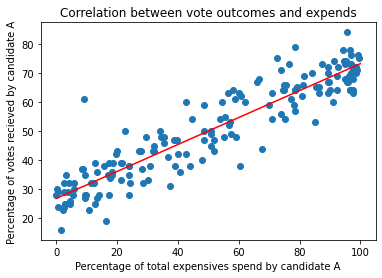

In [ ]:
plt.scatter(df.shareA, df.voteA)
share_axis = np.linspace(0., 100., 100)
plt.plot(share_axis, beta0_h + share_axis * beta1_h, color='red')
plt.title('Correlation between vote outcomes and expends')
plt.xlabel('Percentage of total expensives spend by candidate A')
plt.ylabel('Percentage of votes recieved by candidate A')
plt.show()